In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.transforms import offset_copy
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import numpy as np

import gdal

%matplotlib inline

def make_map(projection=ccrs.LambertConformal()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.xlocator = mticker.FixedLocator([-74, -73, -72, -71, -70])
    gl.ylocator = mticker.FixedLocator([40, 41, 42])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [2]:
buoys = pd.read_excel('buoys.xlsx', header=0, index_col=None, usecols="C:E")
buoys

,Buoys,Longitude,Latitude
0,44097,-71.127,40.969
1,44020,-70.279,41.493
2,44025,-73.164,40.251
3,44017,-72.049,40.693
4,44065,-73.703,40.369
5,44039,-72.655,41.138
6,44040,-73.580,40.956
7,BUZM3,-71.033,41.397


In [3]:
for x,y,z in zip(buoys['Longitude'], buoys['Latitude'], buoys['Buoys']):print(x,y,z)

-71.127 40.969 44097
-70.279 41.493 44020
-73.164 40.251 44025
-72.049 40.693 44017
-73.703 40.369 44065
-72.655 41.138 44039
-73.58 40.956 44040
-71.033 41.397 BUZM3


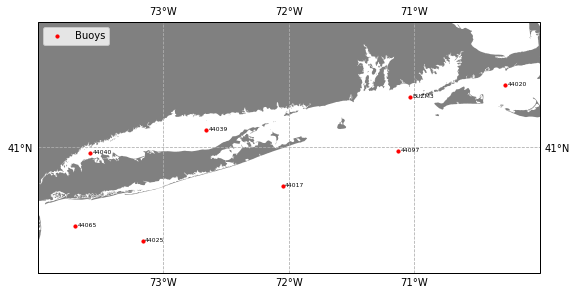

In [4]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent([-74, -70, 40, 42])

# Add markers for the position of the buoys.
plt.scatter(buoys['Longitude'], buoys['Latitude'], s=10, marker='o', color='red', label='Buoys',
            transform=ccrs.Geodetic())

for x,y,z in zip(buoys['Longitude'], buoys['Latitude'], buoys['Buoys']):
    ax.text(x+0.02, y+0.01, z,
                 verticalalignment='center', horizontalalignment='left', fontsize=6,
                 transform=ccrs.Geodetic())

shp = shapereader.Reader('C:/Users/panmits86/Desktop/Python/SNE_shapefile/GSHHS_f_L1_SNE.shp')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='gray')
     
ax.legend(loc='upper left')

plt.savefig('SNE_buoys.png', dpi=300, bbox_inches='tight')